In [ ]:
#########
# 06/11/2023
# APRENDIZADO DE MAQUINA NÃO SUPERVISIONADO
# Clusters
# Pipeline: Sequencia de processamentos com os dados até se alcançar o modelo ideal
#1. Normalizar
#2. Balancear
#3. Determinar os hiperparâmetros (em cluster - numero de clusters a serem obtidos)
#4. Treinameneto
#5. Avaliação

In [4]:
#3. DETERMINAÇÃO DO NUMERO OTIMO DE CLUSTERS
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans #Carregando o indutor do KMeans
from scipy.spatial.distance import cdist#para calcular as distâncias relativas a cada centroide em cada ensaio
import numpy as np
import math

#Abrir os dados
fertility = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023/fertility_Diagnosis.txt',sep = ',')
#Somente números na base
fertility_atributos = fertility.drop(columns='Output')
fertility


,Season,Age,Childish_diseases,Accident,Surgical_intervention,High_fevers,alcohol_consumption,Smoking,hours_sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

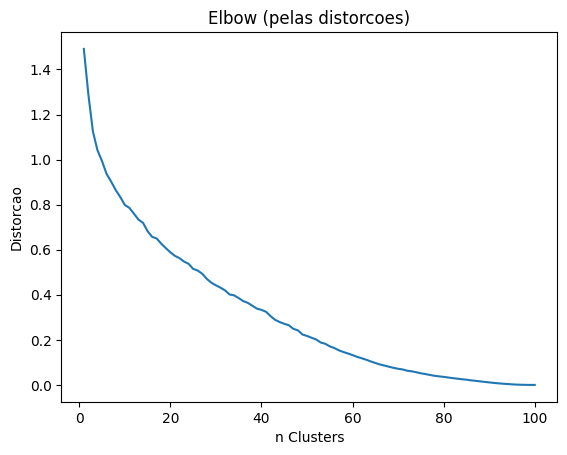

In [5]:
#DETERMINAR O NUMERO DE CLUSTERS PELO MÉTODO DO COTOVELO (Elbow)
#Distorções
distorcoes = []
K = range(1,101) #Range intervalo aberto à direita
for k in K:
  fertility_kmeans_model = KMeans(n_clusters=k).fit(fertility_atributos)
  distorcoes.append(
      sum(np.min(
          cdist(fertility_atributos,fertility_kmeans_model.cluster_centers_,'euclidean'), axis =1
      )/fertility.shape[0])
  )
distorcoes

#Mostrar no gráfico e salvar imagem
#preparar os objetos do gráfico
fig, ax = plt.subplots()
ax.plot(K, distorcoes)
ax.set(xlabel = 'n Clusters', ylabel = 'Distorcao', title = 'Elbow (pelas distorcoes)')
fig.savefig('elbow_iris_distorcao.png')
plt.show()

In [6]:
#Calcular o número ideal de clusters
x0 = K[0]
y0 = distorcoes[0]

x1 = K[len(K)-1]
y1 = distorcoes[len(distorcoes)-1]

print('Pares inicial e final do grafico das distorcoes:')
print('Primeiro par:', x0,',',y0)
print('Útimo par: ', x1,',',y1)

distancias = []
for i in range(len(distorcoes)):
  x = K[i]
  y = distorcoes[i]
  numerador = abs((y1-y0)*x - (x1-x0)*y + x1*y0 - y1*x0)
  denominador = math.sqrt((y1-y0)**2 + (x1-x0)**2)
  distancias.append(numerador/denominador)

print(distancias)
print('maior ditância')
print(np.max(distancias))
print('Posicao da maior distancia dentro da matriz distancias')
print(distancias.index(np.max(distancias)))
print(K[distancias.index(np.max(distancias))])


Pares inicial e final do grafico das distorcoes:
Primeiro par: 1 , 1.4910591253989092
Útimo par:  100 , 5.551115123125783e-19
[2.8706102463856833e-16, 0.18733959077336432, 0.3368762729036505, 0.4044640441361979, 0.43791742599914635, 0.4795475376833166, 0.4983402880246022, 0.5206046485121345, 0.5366313404657266, 0.5568450486895271, 0.5546725570310298, 0.5653260647802432, 0.5768145131815114, 0.5760964555627403, 0.5979067291246231, 0.6080190023685692, 0.6000306576408583, 0.6082943435523691, 0.6129838534057795, 0.6162161610470531, 0.6170153243030868, 0.6121824500566501, 0.6121492152126873, 0.6070346574152136, 0.6145185121693453, 0.6070167862800719, 0.606155556285675, 0.6138071897781984, 0.6154621325445975, 0.612308782096307, 0.6075084013117096, 0.6045063075714515, 0.6076585147274297, 0.5964953414774165, 0.5935725892388923, 0.5916745590466411, 0.5846608294223122, 0.5821440358662222, 0.58015773141208, 0.5706120678136969, 0.5637967071410248, 0.5681151739079733, 0.5696728168995472, 0.564288347

In [7]:
#maior distância
n_clusters_otimo =K[distancias.index(np.max(distancias))]
print('Numero ideal de clusters:',K[distancias.index(np.max(distancias))])

Numero ideal de clusters: 21


In [8]:
#TREINAR O MODELO DEFINITIVO DE ACORDO COM O NUMERO IDEAL DE CLUSTERS
fertility_kmeans_model = KMeans(n_clusters=n_clusters_otimo).fit(fertility_atributos)
print('Centroides obtidos:')
print(fertility_kmeans_model.cluster_centers_)

#salvar o modelo
from pickle import  dump
dump(fertility_kmeans_model,open('/content/drive/MyDrive/Colab Notebooks/2023/fertility_kmeans_model_1.pkl','wb'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centroides obtidos:
[[-6.18571429e-01  6.04285714e-01  1.00000000e+00  0.00000000e+00
   1.11022302e-16  1.00000000e+00  8.57142857e-01 -1.00000000e+00
   4.07142857e-01]
 [-4.97500000e-01  7.10000000e-01  1.00000000e+00  1.00000000e+00
   1.00000000e+00  2.50000000e-01  8.00000000e-01  1.00000000e+00
   3.45000000e-01]
 [ 7.76666667e-01  7.33333333e-01  1.00000000e+00  1.00000000e+00
   0.00000000e+00  3.33333333e-01  7.33333333e-01 -1.00000000e+00
   3.36666667e-01]
 [ 8.32500000e-01  6.95000000e-01  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  7.50000000e-01  7.50000000e-01
   2.97500000e-01]
 [ 1.00000000e+00  6.40000000e-01  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  8.00000000e-01 -7.50000000e-01
   2.97500000e-01]
 [-3.30000000e-01  7.06666667e-01  1.00000000e+00  1.00000000e+00
   0.00000000e+00  6.66666667e-01  9.33333333e-01 -1.00000000e+00
   6.26666667e-01]
 [-3.30000000e-01  5.28000000e-01  1.00000000e+00  1.00000000e+00
   2.000

In [11]:
#EXEMPLO: Uso do modelo para determinar o qual cluster uma nova flor pertence
#Dados dO novo paciente
# fertility_atributos


novo_paciente = [[-0.33, 0.50,1,0,0,0,1.0,-1,0.50]]
print('Novo paciente original:', novo_paciente)
#A proxima linha contem um erro
cluster_paciente = fertility_kmeans_model.predict(novo_paciente)
print(cluster_paciente)

#Exibir o centroide do cluster ao quaol o paciente pertence
print(fertility_kmeans_model.cluster_centers_[cluster_paciente])






Novo paciente original: [[-0.33, 0.5, 1, 0, 0, 0, 1.0, -1, 0.5]]
[16]
[[-7.12857143e-01  6.08571429e-01  8.57142857e-01  0.00000000e+00
   1.11022302e-16 -1.42857143e-01  9.42857143e-01 -8.57142857e-01
   4.74285714e-01]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [13]:
#################
#DESIGNAR UM NOVO PACIENTE A UM CLUSTER CONFORME O MODELO DE CLUSTERS SALVO
#Abrir o modelo de Machine Learning (Base de conhecimento)
from pickle import load
cluster_model = load(open('/content/drive/MyDrive/Colab Notebooks/2023/fertility_kmeans_model_1.pkl', 'rb'))

cluster_designado = cluster_model.predict(novo_paciente)
print('Cluster do novo paciente:', cluster_designado)
print('Centroide designado para o novo paciente (descricao do grupo ao qual ele pertence')
print(cluster_model.cluster_centers_[cluster_designado])


Cluster do novo paciente: [16]
Centroide designado para o novo paciente (descricao do grupo ao qual ele pertence
[[-7.12857143e-01  6.08571429e-01  8.57142857e-01  0.00000000e+00
   1.11022302e-16 -1.42857143e-01  9.42857143e-01 -8.57142857e-01
   4.74285714e-01]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
